<a href="https://colab.research.google.com/github/jaeriver/2022_AI_Security_Project/blob/main/2.Gaussian_Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.isotonic import IsotonicRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
LABELS = ['Normal', 'Break']

monday = pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Monday_Standard_Normal.csv')
monday = monday.iloc[:,1:]  # unnamed_0 제거
monday = monday.drop_duplicates()  # 중복값 제거

tuesday = pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Tuesday_Standard.csv')
tuesday = tuesday.iloc[:,1:]  # unnamed_0 제거
tuesday = tuesday.drop_duplicates()  # 중복값 제거

wednesday = pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Wednesday_Standard.csv')
wednesday = wednesday.iloc[:,1:]  # unnamed_0 제거
wednesday = wednesday.drop_duplicates()  # 중복값 제거

thursday = pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Thursday_Standard.csv')
thursday = thursday.iloc[:,1:]  # unnamed_0 제거
thursday = thursday.drop_duplicates()  # 중복값 제거

friday = pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Friday_Standard.csv')
friday = friday.iloc[:,1:]  # unnamed_0 제거
friday = friday.drop_duplicates()  # 중복값 제거

monday = monday.replace('Anormal', 1)
monday = monday.replace('Normal', 0)
monday = monday[monday['Label'] == 0] # monday에서 정상값만 사용
tuesday = tuesday.replace('Anormal', 1)
tuesday = tuesday.replace('Normal', 0)
wednesday = wednesday.replace('Anormal', 1)
wednesday = wednesday.replace('Normal', 0)
thursday = thursday.replace('Anormal', 1)
thursday = thursday.replace('Normal', 0)
friday = friday.replace('Anormal', 1)
friday = friday.replace('Normal', 0)

monday.head()

,ts,te,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Label
1,-1.596917,-1.597767,-0.361342,-3.248083,0.567861,-1.635225,2.278644,-0.854834,-0.009816,-0.006690,-0.009402,-0.079539,0
3,-1.596917,-1.597767,-0.358325,0.393771,0.567861,0.851502,-0.495151,1.167405,-0.008964,-0.006665,-0.010522,-0.077291,0
6,-1.596892,-1.597742,-0.361342,-2.582210,0.567861,-1.635225,2.272987,-0.854834,-0.009816,-0.006690,-0.009402,-0.079539,0
9,-1.596867,-1.597717,-0.360027,0.393771,0.567861,0.822926,-0.495151,1.167405,-0.008964,-0.006643,-0.010522,-0.070709,0
10,-1.596867,-1.597717,-0.360012,0.393771,0.567861,0.773606,-0.495151,1.167405,-0.008111,-0.006572,-0.009402,-0.069746,0


In [ ]:
x_monday = monday.drop('Label', axis=1).values
y_monday = monday['Label'].values
x_tuesday= tuesday.drop('Label', axis=1).values
y_tuesday = tuesday['Label'].values
x_wednesday= wednesday.drop('Label', axis=1).values
y_wednesday = wednesday['Label'].values
x_thursday= thursday.drop('Label', axis=1).values
y_thursday = thursday['Label'].values
x_friday = friday.drop('Label', axis=1).values
y_friday = friday['Label'].values

In [ ]:
print(monday['Label'].value_counts())
print(tuesday['Label'].value_counts())
print(wednesday['Label'].value_counts())
print(thursday['Label'].value_counts())
print(friday['Label'].value_counts())

0    357241
Name: Label, dtype: int64
0    432018
1     13835
Name: Label, dtype: int64
0    440012
1    252670
Name: Label, dtype: int64
0    456606
1      2216
Name: Label, dtype: int64
0    414314
1    288923
Name: Label, dtype: int64


[[363034  51280]
 [106231 182692]]
0.7760200330756203


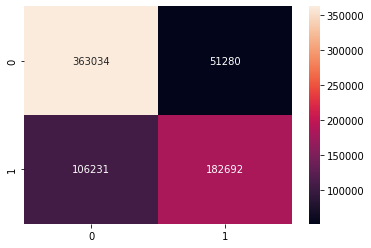

In [ ]:
X_train = x_monday
y_train = y_monday
X_test = x_friday
y_test = y_friday
X_val = x_wednesday
Y_val = y_wednesday

gmm_clf = GaussianMixture(covariance_type='full', n_components=3 ,max_iter=int(1e5))  # Obtained via grid search
# full  tied  diag  spherical
gmm_clf.fit(X_train)
log_probs_val = gmm_clf.score_samples(X_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, Y_val)  

log_probs_test = gmm_clf.score_samples(X_test)
test_probabilities = isotonic_regressor.predict(log_probs_test)
test_predictions = [1 if prob >= 0.5 else 0 for prob in test_probabilities]

cm = confusion_matrix(y_test,test_predictions )
print(cm)
print(accuracy_score(y_test,test_predictions))
sns.heatmap(cm,annot=True,fmt='g')

[[141802 314804]
 [   125   2091]]
0.31361399409792906


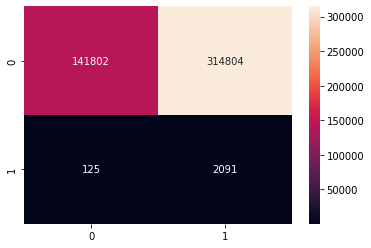

In [ ]:
X_train = x_monday
y_train = y_monday
X_test = x_thursday
y_test = y_thursday
X_val = x_wednesday
Y_val = y_wednesday

gmm_clf = GaussianMixture(covariance_type='full', n_components=3 ,max_iter=int(1e5))  # Obtained via grid search
# full  tied  diag  spherica
gmm_clf.fit(X_train)
log_probs_val = gmm_clf.score_samples(X_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, Y_val)  

log_probs_test = gmm_clf.score_samples(X_test)
test_probabilities = isotonic_regressor.predict(log_probs_test)
test_predictions = [1 if prob >= 0.5 else 0 for prob in test_probabilities]

cm = confusion_matrix(y_test,test_predictions )
print(cm)
print(accuracy_score(y_test,test_predictions))
sns.heatmap(cm,annot=True,fmt='g')

[[154699 277319]
 [  2960  10875]]
0.371364552890751


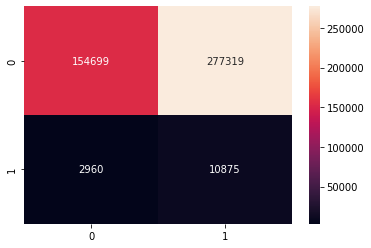

In [ ]:
X_train = x_monday
y_train = y_monday
X_test = x_tuesday
y_test = y_tuesday
X_val = x_wednesday
Y_val = y_wednesday

gmm_clf = GaussianMixture(covariance_type='full', n_components=3 ,max_iter=int(1e5))  # Obtained via grid search
# full  tied  diag  spherica
gmm_clf.fit(X_train)
log_probs_val = gmm_clf.score_samples(X_val)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, Y_val)  

log_probs_test = gmm_clf.score_samples(X_test)
test_probabilities = isotonic_regressor.predict(log_probs_test)
test_predictions = [1 if prob >= 0.5 else 0 for prob in test_probabilities]

cm = confusion_matrix(y_test,test_predictions )
print(cm)
print(accuracy_score(y_test,test_predictions))
sns.heatmap(cm,annot=True,fmt='g')